# Histopathologic Cancer Detection

## Problem Description 
Background:

Cancer detection is a task with significant clinical implications. Detecting metastatic cancer in histopathologic images can not only 
improve diagnostic efficiency but also provide essential decision support for doctors.
The task of this competition is to identify whether metastatic cancer tissue exists in histopathologic image patches.

Task Objective:

This is a binary classification problem.
The model needs to predict whether the central region (32x32 pixels) of the pathology image contains tumor tissue:
    1 indicates the presence of tumor tissue.
    0 indicates the absence of tumor tissue.

Competition Goal:

To build an efficient image classification model capable of accurately predicting the probability for images in the test set.
To submit results in a format that meets competition requirements.


## Dataset Description 
1.Tranning data:
Images stored in the train folder, named by their unique IDs (e.g., abc123.png).
Corresponding labels are provided in train_labels.csv:
    id: Image ID.
    label: Binary label (1 for tumor, 0 for no tumor).

2.Testing Data:
    Images stored in the test folder. These do not have labels and require predictions.

3.Sample Submission:
    A sample_submission.csv file shows the expected submission format, containing id and label columns.

4.Image Details:
    Each image is RGB and has a resolution of 96x96 pixels.
    Only the central 32x32 pixels determine the label.

5.Dataset Size:
    Training Set: ~220,025 images.
    Test Set: ~57,458 images.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os 
from PIL import Image


## Step1 EDA

In [5]:
# 1. Load train_labels.csv
train_labels=pd.read_csv('train_labels.csv')

In [7]:
# check basic information of train_labels.csv
print('Train Labels Basic Info:')
print(train_labels.info())
# Display the label distribution 
print('\nLabels Distribution:')
print(train_labels['label'].value_counts())
# Check for missing values in train_labels.csv
print("\nMissing values in train_labels.csv:")
print(train_labels.isnull().sum())


Train Labels Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None

Labels Distribution:
label
0    130908
1     89117
Name: count, dtype: int64

Missing values in train_labels.csv:
id       0
label    0
dtype: int64


In [9]:
# 2.Verify image files in the train
train_path='train'
train_images=[os.path.splitext(f)[0]for f in os.listdir(train_path)] #list all images in the train folder and remove file extensions
print(f'\nNumber of train images:{len(train_images)}')
print(train_images[:10])


Number of train images:220026
['f0c2a0b8ef3024f407fa97d852d49be0215cafe0', '99ef485f205645918613cd04281098daa7c17819', 'e2612e173abd0e8bb54a3c3db3f264b63d80bffb', '6d1bb57c0606f05dbd75f90a8d9e21a57e1267e0', '9c043ab2adadfeb758c71d21432fccd3e43565c0', '9cc775713dd09351172a350871a547346af08027', '1996c210f020134e986823ca7d4df0a70a799c34', '270d16e6b9d88f09f3cc2e538f23091b186a33e5', '731fe361f4af33b5e4f11d74b2bc7508171904e6', 'c7cf86c53ef00698e1e46f430e8527b534bd0368']


In [10]:
# Check if all images listed in train_labels.csv exist in the train folder
missing_train_images=[img_id for img_id in train_labels['id'] if img_id not in train_images]
if len(missing_train_images)>0:
    print(f'Missing train images:{len(missing_train_images)}')
else:
    print("All train images are accounted for!")

All train images are accounted for!


In [11]:
# 3.Verify the test directory 
test_path='test'
test_images = [os.path.splitext(f)[0] for f in os.listdir(test_path)]
print(f'\nNumber of test images:{len(test_images)}')


Number of test images:57458


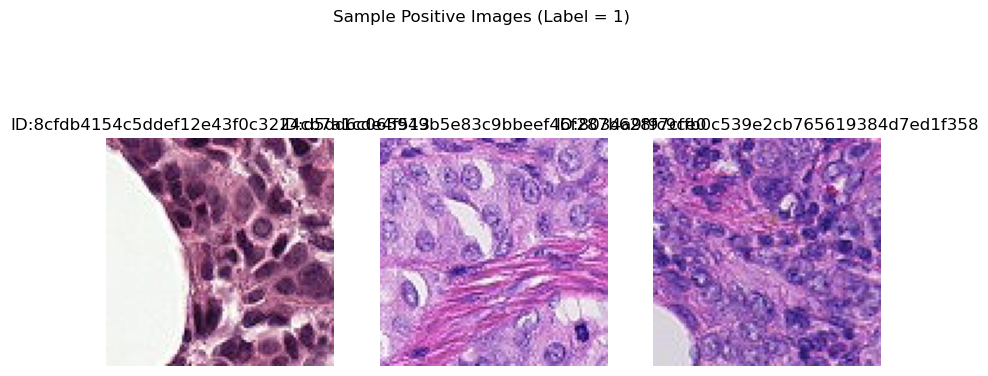

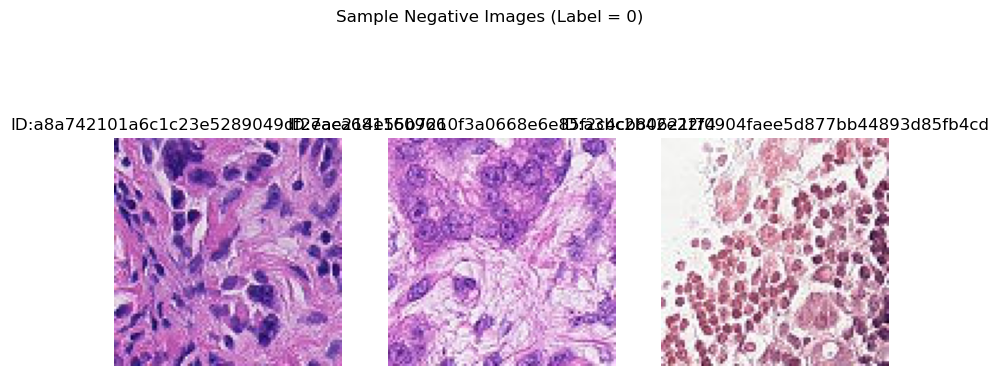

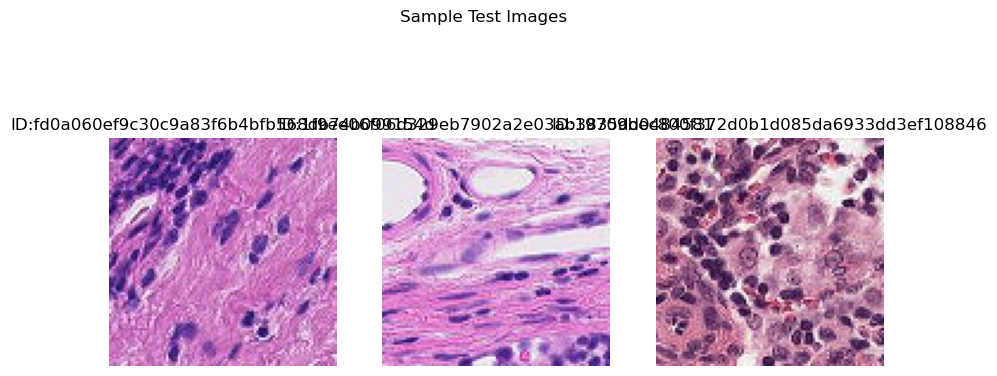

In [12]:
# 4.Visualize sample images from train(positive and negative samples)
# Ramdomly select positive and negative samples
sample_positive=train_labels[train_labels['label']==1].sample(3)['id']
sample_negative=train_labels[train_labels['label']==1].sample(3)['id']
# Define a function to display images
def display_images(image_ids, title,folder_path,extension=".tif"):
    plt.figure(figsize=(10, 5))
    for i, img_id in enumerate(image_ids):
        img_path = os.path.join(folder_path,f"{img_id}{extension}")  # Build the image path
        img = Image.open(img_path)  # Open the image
        plt.subplot(1,len(image_ids), i + 1)
        plt.imshow(img)  # Display the image
        plt.title(f"ID:{img_id}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()
# Display positive and negative samples
display_images(sample_positive, "Sample Positive Images (Label = 1)", train_path, extension=".tif")
display_images(sample_negative, "Sample Negative Images (Label = 0)", train_path, extension=".tif")

# Display sample test images
sample_test_images = test_images[:3]  # Select the first 3 test images
display_images([os.path.splitext(f)[0] for f in sample_test_images], "Sample Test Images", test_path, extension=".tif")

In [17]:
# 5.Analyze image properties
# Check image sizes and modes for a few train images
print('\nChecking image properties')
image_sizes=[]
image_modes=[]
for img_id in train_labels['id'].head(10):
    img_path=os.path.join(train_path,f'{img_id}.tif')
    img=Image.open(img_path)
    image_sizes.append(img.size) #append the image size
    image_modes.append(img.mode) #append the image mode,images color
    print(f'Image ID:{img_id},Size:{img.size},Mode:{img.mode}')
print(f'\nUnique image sizes:{set(image_sizes)}')
print(f'\nUnique image modes:{set(image_modes)}')


Checking image properties
Image ID:f38a6374c348f90b587e046aac6079959adf3835,Size:(96, 96),Mode:RGB
Image ID:c18f2d887b7ae4f6742ee445113fa1aef383ed77,Size:(96, 96),Mode:RGB
Image ID:755db6279dae599ebb4d39a9123cce439965282d,Size:(96, 96),Mode:RGB
Image ID:bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,Size:(96, 96),Mode:RGB
Image ID:068aba587a4950175d04c680d38943fd488d6a9d,Size:(96, 96),Mode:RGB
Image ID:acfe80838488fae3c89bd21ade75be5c34e66be7,Size:(96, 96),Mode:RGB
Image ID:a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da,Size:(96, 96),Mode:RGB
Image ID:7f6ccae485af121e0b6ee733022e226ee6b0c65f,Size:(96, 96),Mode:RGB
Image ID:559e55a64c9ba828f700e948f6886f4cea919261,Size:(96, 96),Mode:RGB
Image ID:8eaaa7a400aa79d36c2440a4aa101cc14256cda4,Size:(96, 96),Mode:RGB

Unique image sizes:{(96, 96)}

Unique image modes:{'RGB'}



Extracting center region of sample train images


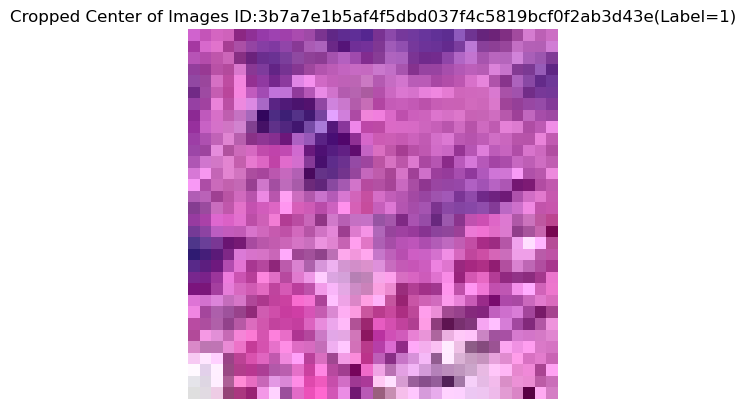

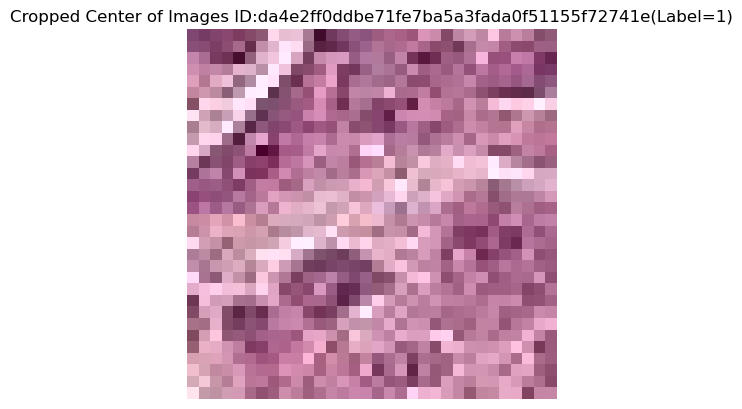

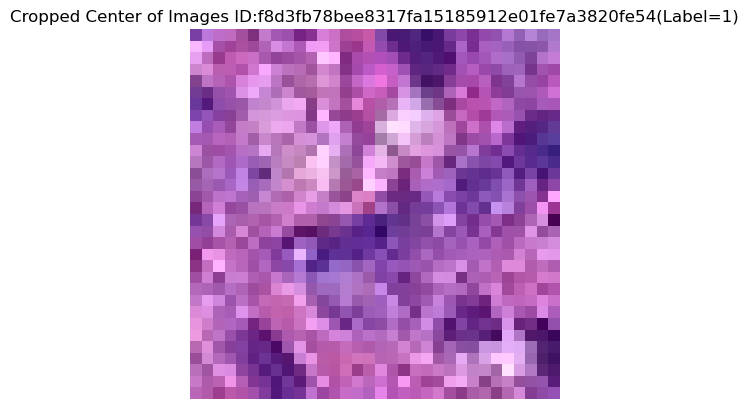

In [13]:
# 6.Extract and visualize the center region of train images
# Define a function to crop the center region
def crop_center (image,crop_size=32):
    width,height=image.size
    left=(width-crop_size)//2
    top=(height-crop_size)//2
    right=left+crop_size
    bottom=top+crop_size
    return image.crop((left,top,right,bottom)) #Crop the center region 
#Crop and display the center of positive samples
print('\nExtracting center region of sample train images')
for img_id in sample_positive:
    img_path=os.path.join(train_path,f'{img_id}.tif')
    img=Image.open(img_path)
    cropped_img=crop_center(img)
    plt.imshow(cropped_img)
    plt.title(f'Cropped Center of Images ID:{img_id}(Label=1)')
    plt.axis('off')
    plt.show()

## Step2 Data preprocessing

In [15]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
# 1.Data augmentation and normalization
# Data augmentation and normalization
transform = transforms.Compose([
    transforms.CenterCrop(32),  # center crop the image to 32x32
    transforms.RandomHorizontalFlip(p=0.5),  # apply horizontal flip with 50% probability
    transforms.RandomRotation(degrees=15),  # apply random rotation within ±15 degrees
    transforms.ToTensor(),  # convert image to PyTorch tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])


In [26]:
# 2.Define a custom dataset class
class HistopathologyDataset(Dataset):
    def __init__(self,ids,labels,folder_path,transform=None):
        self.ids=ids
        self.labels=labels
        self.folder_path=folder_path
        self.transform=transform
    def __len__(self):
        return len(self.ids) # return the size of dataset
    def __getitem__(self,idx):
        img_id=self.ids[idx]  # get the image ID for the current index
        img_path=os.path.join(self.folder_path, f"{img_id}.tif")  # build the image path
        image=Image.open(img_path)  # open the image file
        if self.transform:
            image=self.transform(image)  # apply transformations if defined
        label=self.labels[idx]  # get the label for the current index
        return image,label  # return the image and its corresponding label

    

In [28]:
# 3.split dataset into tranning and validation sets
train_ids, val_ids=train_test_split(train_labels,test_size=0.2,stratify=train_labels['label'])

In [30]:
# 4.Create data loaders for training and validation sets
train_dataset=HistopathologyDataset(train_ids['id'].values,train_ids['label'].values,'train',transform)  # define the training dataset

val_dataset=HistopathologyDataset(val_ids['id'].values,val_ids['label'].values,'train',transform)  # define the validation dataset

train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)  # training data loader
val_loader=DataLoader(val_dataset,batch_size=32,shuffle=False)  # validation data loader

In [32]:
images, labels = next(iter(train_loader))

print(images.shape)  

print(labels.shape)  

torch.Size([32, 3, 32, 32])
torch.Size([32])


## Step3 Model Architecture

In [35]:
import torch
print(torch.backends.mps.is_available())  
print(torch.backends.mps.is_built())  

True
True


In [37]:
print(torch.__version__)
print(torch.backends.mps.is_available())

2.5.1
True


In [39]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim

# Load a pre-trained ResNet model
class PretrainedResNet(nn.Module):
    def __init__(self):
        super(PretrainedResNet,self).__init__()
        self.base_model=models.resnet18(weights=models.ResNet18_Weights.DEFAULT) #load ResNet18
        self.base_model.fc=nn.Linear(self.base_model.fc.in_features,1) #replace output layer for binary classification
        
    def forward(self,x):
        x=torch.sigmoid(self.base_model(x)) # apply sigmoid activation for binary output
        return x
# Initialize the model
model=PretrainedResNet()
device=torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model=model.to(device)

# Define the loss function
criterion=nn.BCEWithLogitsLoss()

# Define the optimizer
optimizer=optim.Adam(model.parameters(),lr=0.001)

# Print the model architecture to verify
print(model)




PretrainedResNet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

## Step4 Model Training

In [42]:
# Number of epochs
num_epochs=3

# Loop through epochs
for epoch in range(num_epochs):
    # training phase
    model.train()
    train_loss=0.0
    for images,labels in train_loader:
        images,labels=images.to(device),labels.to(device) # move data to device 

        # Forward pass
        outputs=model(images)
        loss=criterion(outputs,labels.unsqueeze(1).float()) # compute the loss

        # Backward pass and optimization 
        optimizer.zero_grad() # zero the gradients
        loss.backward() # backpropagate the loss
        optimizer.step() # uodate the weights

        train_loss+=loss.item() # accumulate the training loss
    
    #average trainning loss for this epoch 
    train_loss/=len(train_loader)
    
    # Validation phase
    model.eval() # set the mode l to evaluation mode
    val_loss=0.0
    with torch.no_grad(): #disable gradient computation for validation
        for images,labels in val_loader:
            images,labels=images.to(device),labels.to(device) #move to device
            
            # Forward pass
            outputs=model(images)
            loss=criterion(outputs, labels.unsqueeze(1).float())  # Compute the loss
            val_loss += loss.item()  # Accumulate the validation loss
        # Average validation loss for this epoch
        val_loss /= len(val_loader)


    print(f"Epoch [{epoch+1}/{num_epochs}],Training Loss: {train_loss:.4f},Validation Loss: {val_loss:.4f}")

Epoch [1/3],Training Loss: 0.6562,Validation Loss: 0.6338
Epoch [2/3],Training Loss: 0.6395,Validation Loss: 0.6306
Epoch [3/3],Training Loss: 0.6331,Validation Loss: 0.6320


In [44]:
# Model Evaluation 
from sklearn.metrics import roc_auc_score

# Initialize lists to store predictions and labels
all_preds=[]
all_labels=[]

# Set the model to evaluation mode
model.eval()

# Disable gradient calculation for validation/testing
with torch.no_grad():
    for images, labels in val_loader:
        images, labels=images.to(device), labels.to(device)  # Move data to device

        # Forward pass
        outputs=model(images)
        preds=torch.sigmoid(outputs)  # Apply sigmoid activation to get probabilities

        # Store predictions and labels
        all_preds.extend(preds.cpu().numpy())  # Move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())

# Calculate AUC-ROC score
auc_roc = roc_auc_score(all_labels, all_preds)
print(f"AUC-ROC Score: {auc_roc:.4f}")


AUC-ROC Score: 0.8241


## Step5 Hyperparameter tuning

In [46]:
# Define hyperparameters to tune
learning_rates=[1e-4, 5e-4]
batch_sizes=[64,128]
optimizers=['adam','sgd','adamw']
best_auc = 0
best_params={}

for lr in learning_rates:
    for batch_size in batch_sizes:
        for opt in optimizers:
            print(f"Tuning: lr={lr}, batch_size={batch_size}, optimizer={opt}")
            
            # Define DataLoader with current batch size
            train_loader=DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            val_loader=DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
            
            # Reinitialize model
            model=PretrainedResNet()
            model=model.to(device)
            
            # Define optimizer
            if opt=='adam':
                optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            elif opt=='sgd':
                optimizer=torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
            
            # Define loss function
            criterion=nn.BCEWithLogitsLoss()
            
            # Training loop (for simplicity, reduce epochs for tuning)
            num_epochs=3  # shortened for tuning
            for epoch in range(num_epochs):
                model.train()
                for images, labels in train_loader:
                    images, labels=images.to(device), labels.to(device).unsqueeze(1).float()
                    
                    # Forward pass
                    outputs=model(images)
                    loss=criterion(outputs, labels)
                    
                    # Backward pass
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
            
            # Validation phase
            model.eval()
            y_true=[]
            y_pred=[]
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels=images.to(device), labels.to(device).unsqueeze(1).float()
                    outputs=model(images)
                    y_true.extend(labels.cpu().numpy())
                    y_pred.extend(torch.sigmoid(outputs).cpu().numpy())
            
            # Calculate AUC
            auc=roc_auc_score(y_true, y_pred)
            print(f"AUC: {auc:.4f}")
            
            # Update best parameters
            if auc>best_auc:
                best_auc=auc
                best_params={'lr': lr, 'batch_size': batch_size, 'optimizer': opt}

print(f"\nBest AUC: {best_auc:.4f}")
print(f"Best Parameters: {best_params}")


Tuning: lr=0.0001, batch_size=64, optimizer=adam
AUC: 0.8846
Tuning: lr=0.0001, batch_size=64, optimizer=sgd
AUC: 0.8479
Tuning: lr=0.0001, batch_size=64, optimizer=adamw
AUC: 0.5289
Tuning: lr=0.0001, batch_size=128, optimizer=adam
AUC: 0.8765
Tuning: lr=0.0001, batch_size=128, optimizer=sgd
AUC: 0.8420
Tuning: lr=0.0001, batch_size=128, optimizer=adamw
AUC: 0.5651
Tuning: lr=0.0005, batch_size=64, optimizer=adam
AUC: 0.8559
Tuning: lr=0.0005, batch_size=64, optimizer=sgd
AUC: 0.8662
Tuning: lr=0.0005, batch_size=64, optimizer=adamw
AUC: 0.5191
Tuning: lr=0.0005, batch_size=128, optimizer=adam
AUC: 0.8466
Tuning: lr=0.0005, batch_size=128, optimizer=sgd
AUC: 0.8611
Tuning: lr=0.0005, batch_size=128, optimizer=adamw
AUC: 0.4643

Best AUC: 0.8846
Best Parameters: {'lr': 0.0001, 'batch_size': 64, 'optimizer': 'adam'}


The best AUC score is 0.8846! not bad! 

## Step6 Prediction on Test

In [48]:
class HistopathologyDataset(Dataset):
    def __init__(self, ids, labels, folder_path, transform=None):
        self.ids = ids
        self.labels = labels
        self.folder_path = folder_path
        self.transform = transform

    def __getitem__(self, idx):
        img_id = self.ids[idx]  
        img_path = os.path.join(self.folder_path, f"{img_id}.tif")
        try:
            img = Image.open(img_path)
            if self.transform:
                img = self.transform(img)
            if self.labels is not None:
                return img, self.labels[idx]
            else:
                return img, img_id 
        except FileNotFoundError:
            print(f"File not found: {img_path}")
            return None, None

    def __len__(self):
        return len(self.ids)

# Define best patameters
best_params = {'lr': 0.0001, 'batch_size': 64, 'optimizer': 'adam'}
# Reinitialize the model
model = PretrainedResNet()
model = model.to(device)

# Define optimizer
if best_params['optimizer']=='adam':
    optimizer=torch.optim.Adam(model.parameters(),lr=best_params['lr'])
elif best_params['optimizer']=='sgd':
    optimizer=torch.optim.SGD(model.parameters(),lr=best_params['lr'],momentum=0.9)

# Define loss function
criterion=nn.BCEWithLogitsLoss()

#Create data loaders for test sets
test_dataset=HistopathologyDataset(test_images, None, test_path, transform)
test_loader=DataLoader(test_dataset,batch_size=64,shuffle=False)

# Test phase
model.eval()
test_predictions=[]
test_image_ids=[]

with torch.no_grad():
    for images, ids in test_loader:
        if None in ids:
            print(f"Skipping batch due to missing IDs: {ids}")
            continue

        images=images.to(device)  
        outputs=model(images)  
        preds=torch.sigmoid(outputs).to("cpu").numpy()  

        
        test_predictions.extend(preds)
        test_image_ids.extend(ids)


submission=pd.DataFrame({
    'id': [img_id.replace(".tif", "") for img_id in test_image_ids],
    'label': [1 if p>0.6 else 0 for p in test_predictions]  #binary 
})

# Save result
submission.to_csv('test_predictions.csv', index=False)
print("Test predictions saved to 'test_predictions.csv'.")


Test predictions saved to 'test_predictions.csv'.


## Conclusion 
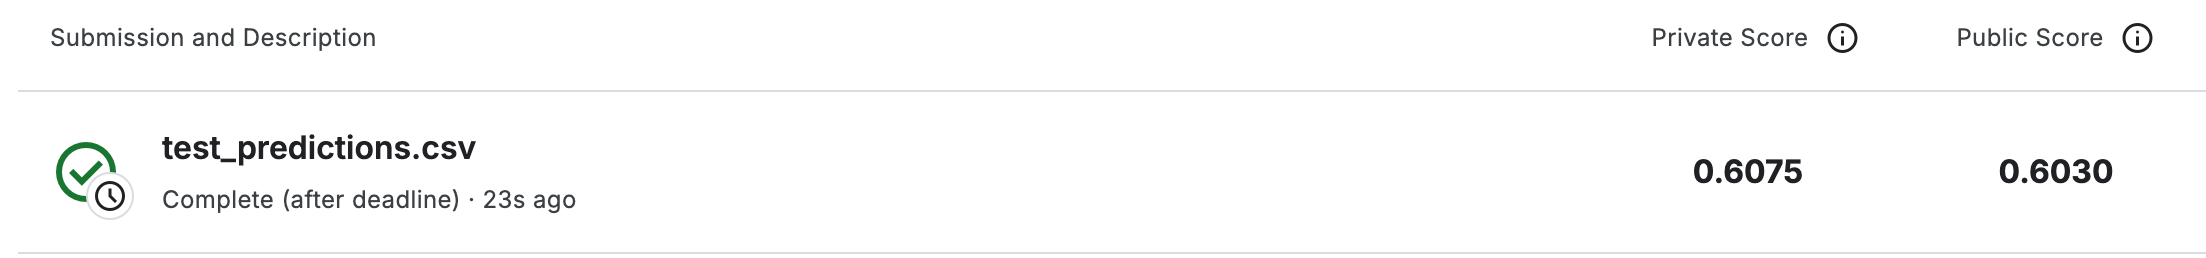
The score is 60.3% which is indicate that while model performed reasonably well,but there is significant room for improvment to enhance its generalization to unseen data.

Feture improvement:experiment with more complex architechtures or fine -tune ore-trained models for improved performance.